In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
df_copy = pd.read_excel("Online Retail.xlsx")

In [ ]:
df = df_copy
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
TotalPrice          0
dtype: int64

In [ ]:
df['Description'].fillna('Unknown', inplace=True)

In [ ]:
# we can impute missing CustomerID values with a placeholder value (e.g., -1) to retain the data while indicating that these records do not have a valid customer ID
df['CustomerID'].fillna(-1, inplace=True)

In [ ]:
z_scores = stats.zscore(df[['Quantity', 'UnitPrice', 'TotalPrice']])
threshold = 3

is_outlier = (abs(z_scores) > threshold).any(axis=1)

outliers = df[is_outlier]

print(outliers)

       InvoiceNo StockCode                          Description  Quantity  \
870       536477     21137             BLACK RECORD COVER FRAME       480   
1814      536544       DOT                       DOTCOM POSTAGE         1   
3041      536592       DOT                       DOTCOM POSTAGE         1   
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
4505      536785     22423             REGENCY CAKESTAND 3 TIER       144   
...          ...       ...                                  ...       ...   
540071    581459     22197                       POPCORN HOLDER      1200   
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   
540908    581492       DOT                       DOTCOM POSTAGE         1   
541540    581498       DOT                       DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPri

In [ ]:
median_values = df[['Quantity', 'UnitPrice', 'TotalPrice']].median()

# Replace outliers with the median value
df.loc[is_outlier, ['Quantity', 'UnitPrice', 'TotalPrice']] = median_values.values

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
df["TotalPrice"] = df['Quantity']*df['UnitPrice']
df

<ipython-input-59-36bf9f6483e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalPrice"] = df['Quantity']*df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
numeric_summary = df[['Quantity', 'UnitPrice', 'TotalPrice']].describe()

categorical_summary = df[['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']].describe()

In [ ]:
numeric_summary

,Quantity,UnitPrice,TotalPrice
count,536641.000000,536641.000000,536641.000000
mean,9.212280,3.529291,17.384032
std,25.468826,7.525167,41.518457
min,-635.000000,0.000000,-1110.000000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.840000
75%,10.000000,4.130000,17.400000
max,666.000000,295.200000,1158.000000


In [ ]:
categorical_summary

,CustomerID
count,536641.000000
mean,11435.653019
std,6795.467745
min,-1.000000
25%,-1.000000
50%,14336.000000
75%,16241.000000
max,18287.000000


In [ ]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['TotalPrice'] > 0)]

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


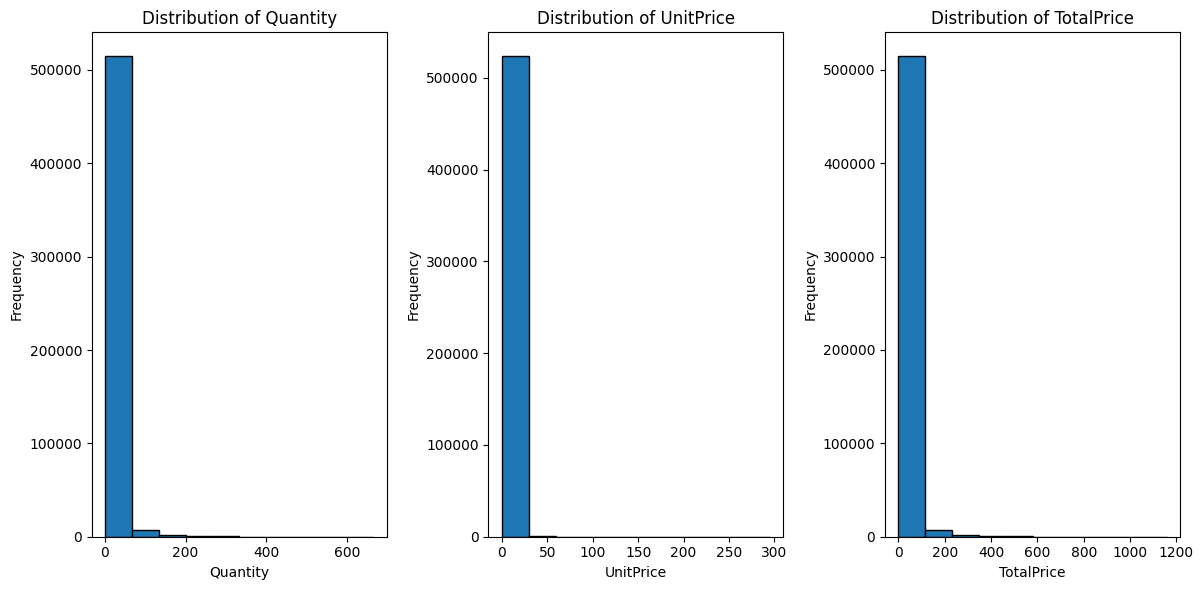

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df['Quantity'], edgecolor='k')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')

plt.subplot(1, 3, 2)
plt.hist(df['UnitPrice'], edgecolor='k')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.title('Distribution of UnitPrice')

plt.subplot(1, 3, 3)
plt.hist(df['TotalPrice'], edgecolor='k')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.title('Distribution of TotalPrice')

plt.tight_layout()
plt.show()

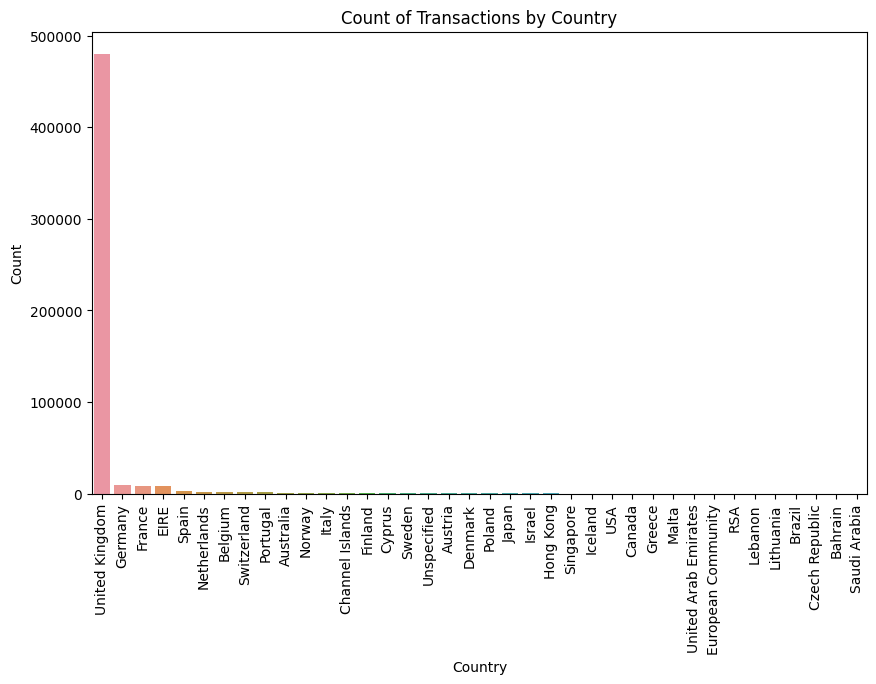

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Transactions by Country')
plt.show()

<ipython-input-69-f3955ae6bd8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-69-f3955ae6bd8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['InvoiceDate'].dt.date
<ipython-input-69-f3955ae6bd8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

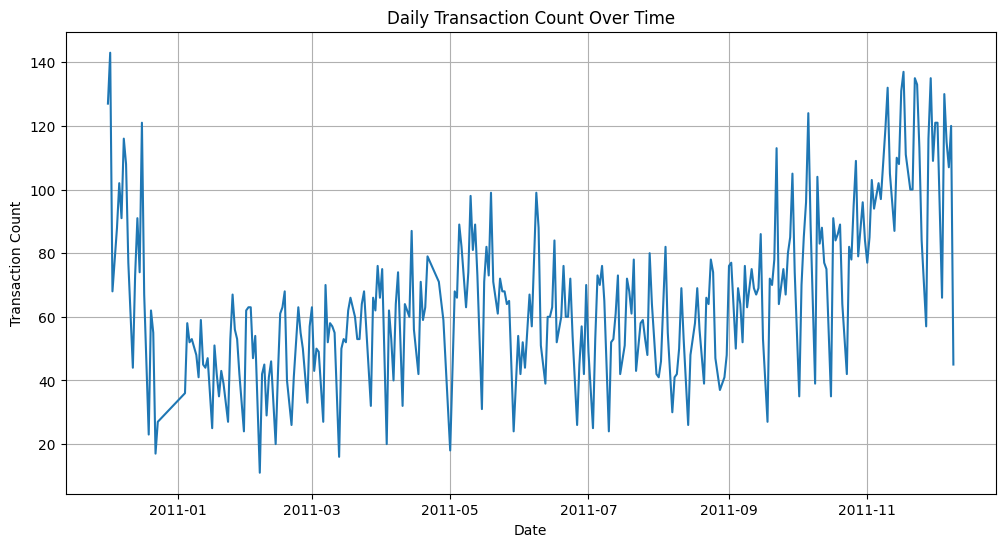

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract date and time components
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

daily_transaction_count = df.groupby('Date')['InvoiceNo'].nunique()
plt.figure(figsize=(12, 6))
plt.plot(daily_transaction_count)
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Daily Transaction Count Over Time')
plt.grid()
plt.show()

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00


In [ ]:
encoder = LabelEncoder()

df['Country_encoded'] = encoder.fit_transform(df['Country'])

label_to_country = {label: country for label, country in enumerate(encoder.classes_)}

for label, country in label_to_country.items():
    print(f"Label {label}: {country}")

Label 0: Australia
Label 1: Austria
Label 2: Bahrain
Label 3: Belgium
Label 4: Brazil
Label 5: Canada
Label 6: Channel Islands
Label 7: Cyprus
Label 8: Czech Republic
Label 9: Denmark
Label 10: EIRE
Label 11: European Community
Label 12: Finland
Label 13: France
Label 14: Germany
Label 15: Greece
Label 16: Hong Kong
Label 17: Iceland
Label 18: Israel
Label 19: Italy
Label 20: Japan
Label 21: Lebanon
Label 22: Lithuania
Label 23: Malta
Label 24: Netherlands
Label 25: Norway
Label 26: Poland
Label 27: Portugal
Label 28: RSA
Label 29: Saudi Arabia
Label 30: Singapore
Label 31: Spain
Label 32: Sweden
Label 33: Switzerland
Label 34: USA
Label 35: United Arab Emirates
Label 36: United Kingdom
Label 37: Unspecified


<ipython-input-73-7ffa0ac0e761>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country_encoded'] = encoder.fit_transform(df['Country'])


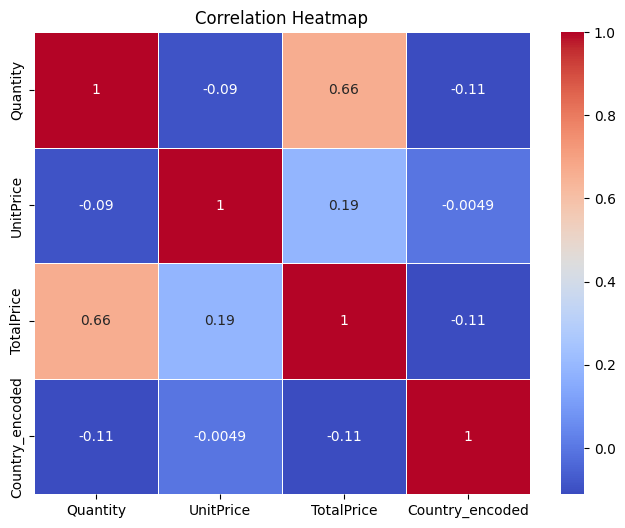

In [ ]:
correlation_matrix = df[['Quantity', 'UnitPrice', 'TotalPrice','Country_encoded']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X_train, X_test = train_test_split(df[['Quantity', 'UnitPrice', 'TotalPrice']], test_size=0.2, random_state=42)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, random_state=42)
  kmeans.fit(X_train)
  inertias.append(kmeans.inertia_)


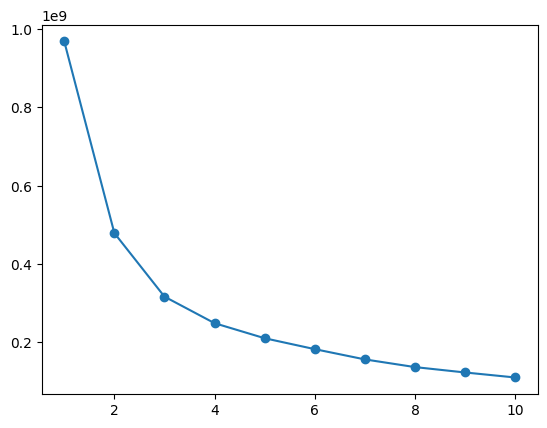

In [ ]:
plt.plot(range(1,11),inertias,marker='o')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

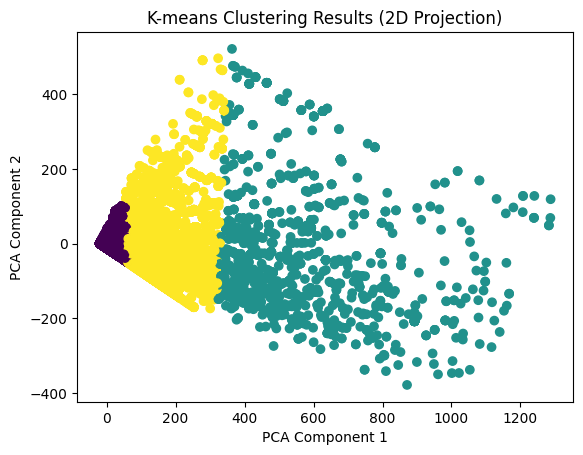

In [ ]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Create a scatter plot of the clusters
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering Results (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()